In [93]:
#Herramientas
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
from sklearn import preprocessing
#Algoritmos
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import KFold

from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline

#Metricas
from sklearn.metrics import classification_report

#Codificacion de variables
from category_encoders import one_hot
#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

In [2]:
data=pd.read_excel("Libro2.xlsx")
data.head(5)

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
data.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,3,e,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,4,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.Clase=data.Clase.replace({'p':'venenosa','e':'comestible'})
data.TipoCabeza=data.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
data.SuperficieCabeza=data.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
data.ColorCabeza=data.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data.Moretones=data.Moretones.replace({'t':'si','f':'no'})
data.Fragancia=data.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
data.AccesorioBranquial=data.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
data.EspacioBranquias=data.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
data.TamannoBranquia=data.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
data.ColorBranquia=data.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data.FormaTallo=data.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
data.Volva=data.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
data.SuperficieSuperioralAnillo=data.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data.SuperficieInferioralAnillo=data.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data.ColorTalloSuperioralAnillo=data.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data.ColorTalloInferioralAnillo=data.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data.TipoVelo=data.TipoVelo.replace({'p':'parcial','u':'universal'})
data.ColorVelo=data.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
data.CantidadAnillos=data.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
data.TipoAnillo=data.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
data.ColorImpresionEsporas=data.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
data.Poblacion=data.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
data.Habitat=data.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
data.head(5)

,ID,Clase,TipoCabeza,SuperficieCabeza,ColorCabeza,Moretones,Fragancia,AccesorioBranquial,EspacioBranquias,TamannoBranquia,...,SuperficieInferioralAnillo,ColorTalloSuperioralAnillo,ColorTalloInferioralAnillo,TipoVelo,ColorVelo,CantidadAnillos,TipoAnillo,ColorImpresionEsporas,Poblacion,Habitat
0,1,venenosa,convexa,lisa,marron,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
1,2,comestible,convexa,lisa,amarillo,si,almendra,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,pastos
2,3,comestible,campana,lisa,blanco,si,anis,libre,cerca,ancho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,marron,numerosa,prados
3,4,venenosa,convexa,escamosa,blanco,si,acre,libre,cerca,estrecho,...,liso,blanco,blanco,parcial,blanco,uno,colgante,negro,dispersa,urbano
4,5,comestible,convexa,lisa,gris,no,inoloro,libre,abarrotado,ancho,...,liso,blanco,blanco,parcial,blanco,uno,evanecente,marron,abundante,pastos


Valores Nulos por Variable

<AxesSubplot: >

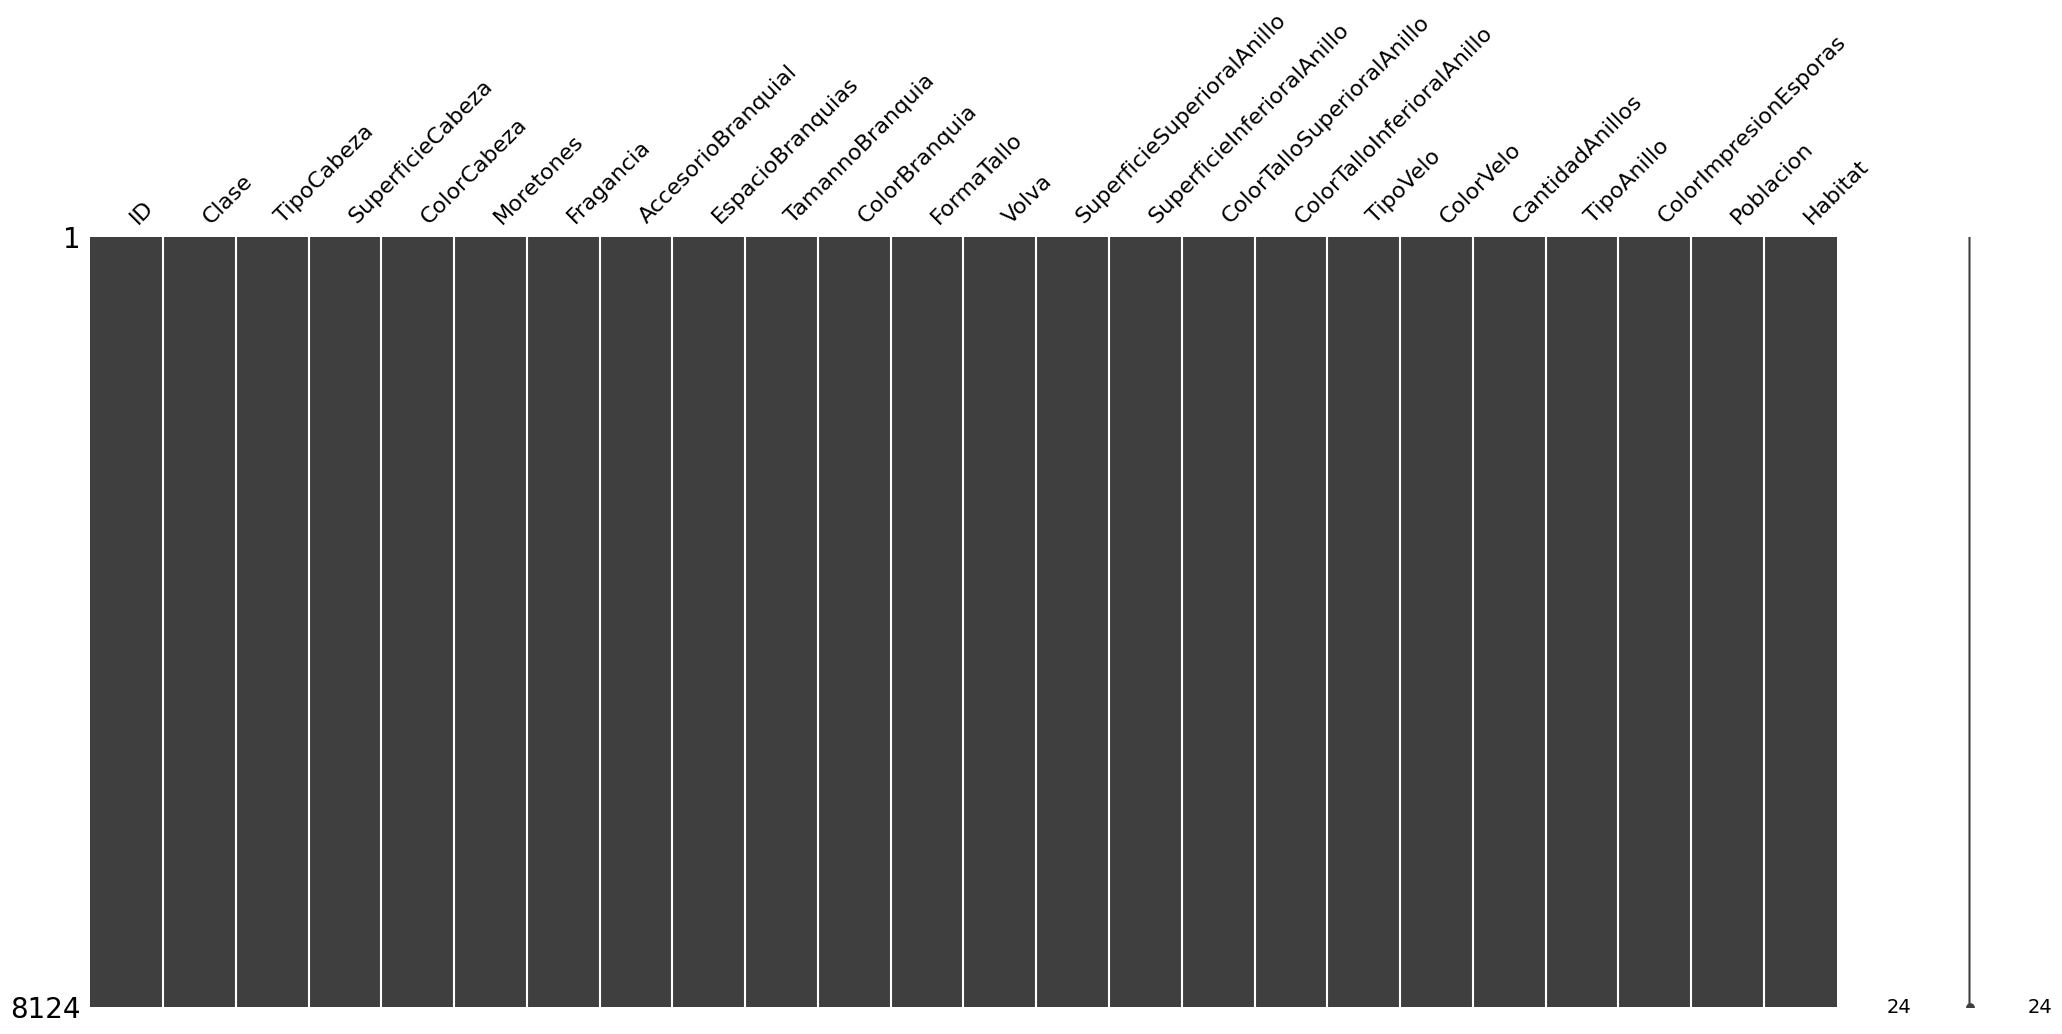

In [6]:
msno.matrix(data)

In [7]:
data.isnull().sum()

ID                            0
Clase                         0
TipoCabeza                    0
SuperficieCabeza              0
ColorCabeza                   0
Moretones                     0
Fragancia                     0
AccesorioBranquial            0
EspacioBranquias              0
TamannoBranquia               0
ColorBranquia                 0
FormaTallo                    0
Volva                         0
SuperficieSuperioralAnillo    0
SuperficieInferioralAnillo    0
ColorTalloSuperioralAnillo    0
ColorTalloInferioralAnillo    0
TipoVelo                      0
ColorVelo                     0
CantidadAnillos               0
TipoAnillo                    0
ColorImpresionEsporas         0
Poblacion                     0
Habitat                       0
dtype: int64

Tratamiento de Valores erroneos

Reemplazo el valor '?' de la variable Volva por la Moda de la misma. 

In [8]:
Moda=pd.Series(data[['Volva']].values.flatten()).mode()[0] #Obtengo un vector de la dimension original de la variable, lo "aplano" a una sola dimension y lo transformo en una serie para poder utilizar el metodo mode()
data.Volva=data.Volva.replace({"?": Moda})

Seleccion de Variables

In [9]:
data.columns.values

array(['ID', 'Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza',
       'Moretones', 'Fragancia', 'AccesorioBranquial', 'EspacioBranquias',
       'TamannoBranquia', 'ColorBranquia', 'FormaTallo', 'Volva',
       'SuperficieSuperioralAnillo', 'SuperficieInferioralAnillo',
       'ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo',
       'TipoVelo', 'ColorVelo', 'CantidadAnillos', 'TipoAnillo',
       'ColorImpresionEsporas', 'Poblacion', 'Habitat'], dtype=object)

In [11]:
Variables_quitar=['ID','AccesorioBranquial','EspacioBranquias','Volva','SuperficieSuperioralAnillo','SuperficieInferioralAnillo','ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo', 'TipoVelo', 'ColorVelo','CantidadAnillos', 'TipoAnillo','ColorImpresionEsporas']
data=data.drop(labels=Variables_quitar, axis=1)
print(data.columns)

Index(['Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza', 'Moretones',
       'Fragancia', 'TamannoBranquia', 'ColorBranquia', 'FormaTallo',
       'Poblacion', 'Habitat'],
      dtype='object')


<h2>Codificacion de variables categoricas</h2>

Separo las variables con mas categorias para realizar One Hot Encoding, y con las que poseen menos categorias aplicare Label Encoding

In [12]:
p=[data.Clase,data.Moretones,data.FormaTallo,data.TamannoBranquia]
m=[data.TipoCabeza,data.SuperficieCabeza,data.ColorCabeza,data.Fragancia,data.ColorBranquia,data.Poblacion,data.Habitat]
Muchas_categorias=pd.DataFrame(m)
Pocas_categorias=pd.DataFrame(p)
Pocas_categorias=Pocas_categorias.transpose()
Muchas_categorias=Muchas_categorias.transpose()

One Hot Encoding

In [13]:
ce_ohe=one_hot.OneHotEncoder(use_cat_names=True) #Inicio el codificador
ce_dummies=ce_ohe.fit_transform(Muchas_categorias) #Lo entreno
ce_dummies.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Poblacion_diversa,Poblacion_solitaria,Poblacion_agrupada,Habitat_urbano,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
ce_dummies=pd.DataFrame(ce_dummies)
data_set_trabajo=pd.concat([ce_dummies,Pocas_categorias], axis=1) #Concateno al dataset orifinal
data_set_trabajo.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas,Clase,Moretones,FormaTallo,TamannoBranquia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,si,agrandando,ancho
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,comestible,si,agrandando,ancho
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,venenosa,si,agrandando,estrecho
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,comestible,no,disminuyendo,ancho


Label Encoding

In [21]:
le = preprocessing.LabelEncoder()
data_set_trabajo['Clase']=le.fit_transform(data['Clase'])
data_set_trabajo['Moretones']=le.fit_transform(data['Moretones'])
data_set_trabajo['FormaTallo']=le.fit_transform(data['FormaTallo'])
data_set_trabajo['TamannoBranquia']=le.fit_transform(data['TamannoBranquia'])
data_set_trabajo.head(5)

,TipoCabeza_convexa,TipoCabeza_campana,TipoCabeza_hundida,TipoCabeza_plana,TipoCabeza_protuberante,TipoCabeza_conica,SuperficieCabeza_lisa,SuperficieCabeza_escamosa,SuperficieCabeza_fibrosa,SuperficieCabeza_ranuras,...,Habitat_pastos,Habitat_prados,Habitat_bosques,Habitat_senderos,Habitat_residuos,Habitat_hojas,Clase,Moretones,FormaTallo,TamannoBranquia
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Division de Dataset de trabajo en Train & Test

In [38]:
x=data_set_trabajo.drop(['Clase'],axis=1)
y=data_set_trabajo['Clase']

In [102]:
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.3, random_state=3)

A continuacion se aplicaran 3 algoritmos diferentes para analizar sus metricas.

Support Vector Machines

In [103]:
modelo_SVM= SVC(C = 100, kernel = 'linear', random_state=3)
modelo_SVM.fit(x_train, y_train)

SVC(C=100, kernel='linear', random_state=3)

In [104]:
y_test_pred_SVM= modelo_SVM.predict(x_test)

In [106]:
reporte_SVN=classification_report(y_test,y_test_pred_SVM)
print(reporte_SVN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Decission Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 3) 

In [95]:
arbol_de_decision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=3)

In [96]:
y_test_pred_tree = arbol_de_decision.predict(x_test)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1279
           1       1.00      0.99      0.99      1159

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [77]:
x_test.columns

Index(['TipoCabeza_convexa', 'TipoCabeza_campana', 'TipoCabeza_hundida',
       'TipoCabeza_plana', 'TipoCabeza_protuberante', 'TipoCabeza_conica',
       'SuperficieCabeza_lisa', 'SuperficieCabeza_escamosa',
       'SuperficieCabeza_fibrosa', 'SuperficieCabeza_ranuras',
       'ColorCabeza_marron', 'ColorCabeza_amarillo', 'ColorCabeza_blanco',
       'ColorCabeza_gris', 'ColorCabeza_rojo', 'ColorCabeza_rosa',
       'ColorCabeza_beige', 'ColorCabeza_violeta', 'ColorCabeza_canela',
       'ColorCabeza_verde', 'Fragancia_acre', 'Fragancia_almendra',
       'Fragancia_anis', 'Fragancia_inoloro', 'Fragancia_fetido',
       'Fragancia_creosota', 'Fragancia_pescado', 'Fragancia_especiado',
       'Fragancia_mohoso', 'ColorBranquia_negro', 'ColorBranquia_marron',
       'ColorBranquia_gris', 'ColorBranquia_rosa', 'ColorBranquia_blanco',
       'ColorBranquia_chocolate', 'ColorBranquia_violeta',
       'ColorBranquia_rojo', 'ColorBranquia_beige', 'ColorBranquia_verde',
       'ColorBranquia_a

Nearest Neighbor

In [94]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(x_train, y_train)

Pipeline(steps=[('nca', NeighborhoodComponentsAnalysis(random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [98]:
y_test_pred_NCA=nca_pipe.predict(x_test)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_NCA))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

